In [30]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset
df = pd.read_csv("/content/Data_tanaman_pangan_Sumatera.csv")

In [31]:
df

,Item,Provinsi,Tahun,Produksi,Curah hujan,Kelembapan,Suhu rata-rata,Luas Panen
0,Jagung,Aceh,1993,38924.0,1627.0,82.00,26.06,17941.0
1,Jagung,Aceh,1994,28578.0,1521.0,82.12,26.92,13105.0
2,Jagung,Aceh,1995,44921.0,1476.0,82.72,26.27,20639.0
3,Jagung,Aceh,1996,45566.0,1557.0,83.00,26.08,19677.0
4,Jagung,Aceh,1997,58679.0,1339.0,82.46,26.31,25312.0
...,...,...,...,...,...,...,...,...
995,Kedelai,Lampung,2013,6156.0,2456.7,81.00,26.70,4986.0
996,Kedelai,Lampung,2014,13777.0,1682.5,79.90,25.80,11362.0
997,Kedelai,Lampung,2015,9815.0,1628.1,78.90,27.10,8407.0
998,Kedelai,Lampung,2016,9960.0,2317.6,79.40,26.45,8181.0


In [32]:
df.isnull().sum()

,0
Item,0
Provinsi,0
Tahun,0
Produksi,0
Curah hujan,0
Kelembapan,0
Suhu rata-rata,0
Luas Panen,0


In [33]:
df.describe()

,Tahun,Produksi,Curah hujan,Kelembapan,Suhu rata-rata,Luas Panen
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,2005.000000,2.545344e+05,2481.798000,80.890800,26.863750,32108.245000
std,7.214711,9.291938e+05,1030.658347,4.986448,1.225025,73492.753815
min,1993.000000,7.600000e+01,222.500000,54.200000,22.190000,72.000000
25%,1999.000000,9.424000e+03,1787.000000,78.975000,26.255000,3547.500000
50%,2005.000000,3.216300e+04,2376.000000,82.455000,26.775000,7553.500000
75%,2011.000000,9.324000e+04,3077.750000,84.017500,27.300000,19987.750000
max,2017.000000,9.193676e+06,5522.000000,90.600000,29.850000,447509.000000


In [34]:
df_one = pd.get_dummies(df, columns=['Provinsi', 'Item'], prefix = ['Provinsi', 'Item'])

In [35]:
df_one

,Tahun,Produksi,Curah hujan,Kelembapan,Suhu rata-rata,Luas Panen,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara,Item_Jagung,Item_Kacang Tanah,Item_Kedelai,Item_Ubi Jalar,Item_Ubi Kayu
0,1993,38924.0,1627.0,82.00,26.06,17941.0,True,False,False,False,False,False,False,False,True,False,False,False,False
1,1994,28578.0,1521.0,82.12,26.92,13105.0,True,False,False,False,False,False,False,False,True,False,False,False,False
2,1995,44921.0,1476.0,82.72,26.27,20639.0,True,False,False,False,False,False,False,False,True,False,False,False,False
3,1996,45566.0,1557.0,83.00,26.08,19677.0,True,False,False,False,False,False,False,False,True,False,False,False,False
4,1997,58679.0,1339.0,82.46,26.31,25312.0,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2013,6156.0,2456.7,81.00,26.70,4986.0,False,False,False,True,False,False,False,False,False,False,True,False,False
996,2014,13777.0,1682.5,79.90,25.80,11362.0,False,False,False,True,False,False,False,False,False,False,True,False,False
997,2015,9815.0,1628.1,78.90,27.10,8407.0,False,False,False,True,False,False,False,False,False,False,True,False,False
998,2016,9960.0,2317.6,79.40,26.45,8181.0,False,False,False,True,False,False,False,False,False,False,True,False,False


In [36]:
df_one = df_one.drop(columns = 'Tahun')

In [37]:
df_one.head()

,Produksi,Curah hujan,Kelembapan,Suhu rata-rata,Luas Panen,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara,Item_Jagung,Item_Kacang Tanah,Item_Kedelai,Item_Ubi Jalar,Item_Ubi Kayu
0,38924.0,1627.0,82.00,26.06,17941.0,True,False,False,False,False,False,False,False,True,False,False,False,False
1,28578.0,1521.0,82.12,26.92,13105.0,True,False,False,False,False,False,False,False,True,False,False,False,False
2,44921.0,1476.0,82.72,26.27,20639.0,True,False,False,False,False,False,False,False,True,False,False,False,False
3,45566.0,1557.0,83.00,26.08,19677.0,True,False,False,False,False,False,False,False,True,False,False,False,False
4,58679.0,1339.0,82.46,26.31,25312.0,True,False,False,False,False,False,False,False,True,False,False,False,False


In [38]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Produksi                   1000 non-null   float64
 1   Curah hujan                1000 non-null   float64
 2   Kelembapan                 1000 non-null   float64
 3   Suhu rata-rata             1000 non-null   float64
 4   Luas Panen                 1000 non-null   float64
 5   Provinsi_Aceh              1000 non-null   bool   
 6   Provinsi_Bengkulu          1000 non-null   bool   
 7   Provinsi_Jambi             1000 non-null   bool   
 8   Provinsi_Lampung           1000 non-null   bool   
 9   Provinsi_Riau              1000 non-null   bool   
 10  Provinsi_Sumatera Barat    1000 non-null   bool   
 11  Provinsi_Sumatera Selatan  1000 non-null   bool   
 12  Provinsi_Sumatera Utara    1000 non-null   bool   
 13  Item_Jagung                1000 non-null   bool  

In [39]:
X_reg=df_one.loc[:, df_one.columns != 'Produksi'].values
y_reg=df_one['Produksi'].values

In [40]:
X_reg

array([[1627.0, 82.0, 26.06, ..., False, False, False],
       [1521.0, 82.12, 26.92, ..., False, False, False],
       [1476.0, 82.72, 26.27, ..., False, False, False],
       ...,
       [1628.1, 78.9, 27.1, ..., True, False, False],
       [2317.6, 79.4, 26.45, ..., True, False, False],
       [1825.1, 77.04, 26.36, ..., True, False, False]], dtype=object)

In [41]:
y_reg = y_reg.reshape(-1,1)

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg,test_size=0.2, random_state=42)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (800, 17)
X_test : (200, 17)
y_train : (800, 1)
y_test : (200, 1)


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
y_train[:, :] = sc.fit_transform(y_train[:, :])
y_test[:, :] = sc.transform(y_test[:, :])

In [44]:
print("Data type of X_train:", X_train.dtype)
print("Data type of y_train:", y_train.dtype)

Data type of X_train: object
Data type of y_train: float64


In [45]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [46]:
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model=Sequential()

model.add(Dense(60, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu',kernel_initializer='normal'))

model.add(Dense(1,activation='linear',kernel_initializer='normal'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 60)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,941 (11.49 KB)

 Trainable params: 2,941 (11.49 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from keras.callbacks import History
history = History()
# Use a different variable name for the fit output to avoid confusion with the callback class
fit_history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, validation_split=0.2, callbacks=[history])

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.4800 - mean_squared_error: 1.4800 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9662 - mean_squared_error: 0.9662 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4186 - mean_squared_error: 1.4186 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7221 - mean_squared_error: 0.7221 - val_loss: 0.0719 - val_mean_squared_error: 0.0719
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5096 - mean_squared_error: 0.5096 - val_loss: 0.1368 - val_mean_squared_error: 0.1368
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4410 - mean_squared_error: 0.4410 - val_loss: 0.1402 - val_mean_squared_error: 0.1402
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.118

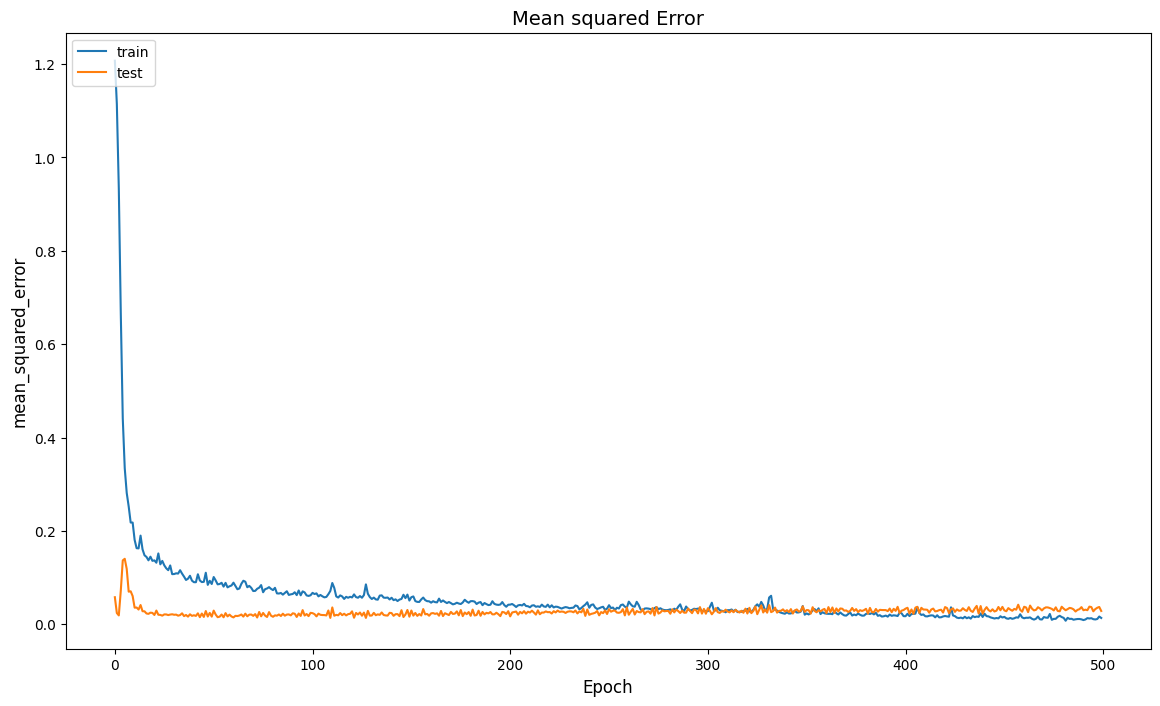

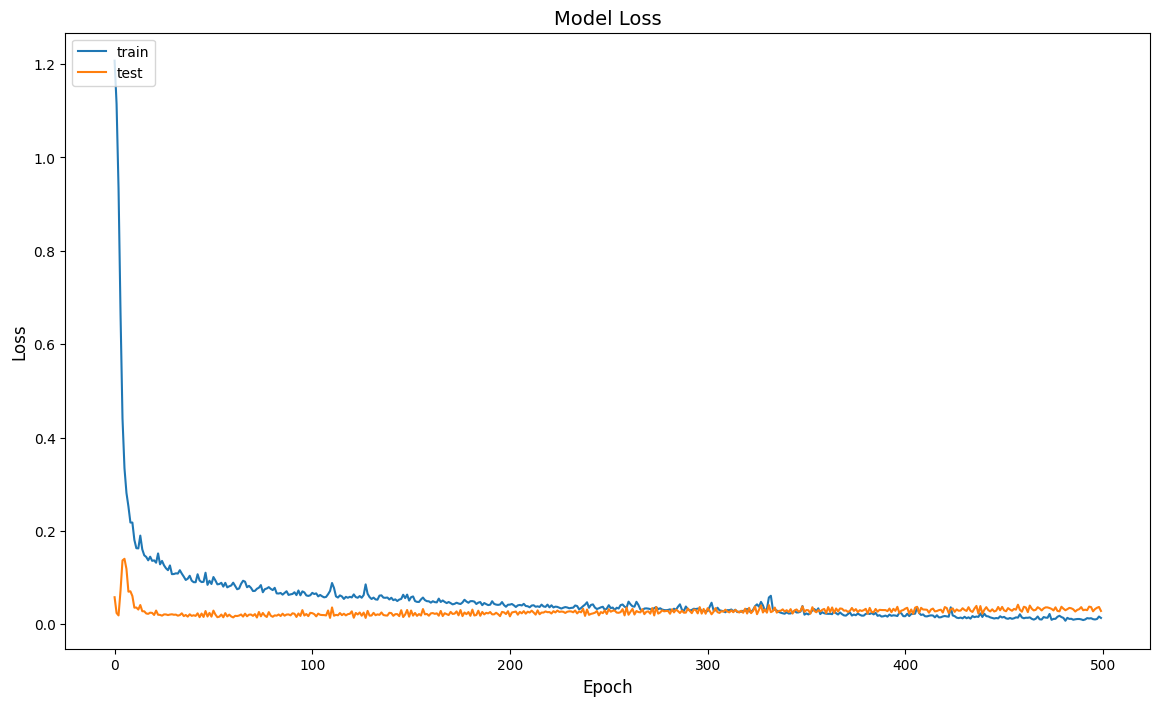

In [49]:
plt.figure(figsize=(14,8))
# Access the history from the fit_history object, not the History class
plt.plot(fit_history.history['mean_squared_error'])
plt.plot(fit_history.history['val_mean_squared_error'])
plt.title('Mean squared Error', fontsize=14)
plt.ylabel('mean_squared_error', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
# Access the history from the fit_history object, not the History class
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 0, 'epoch')

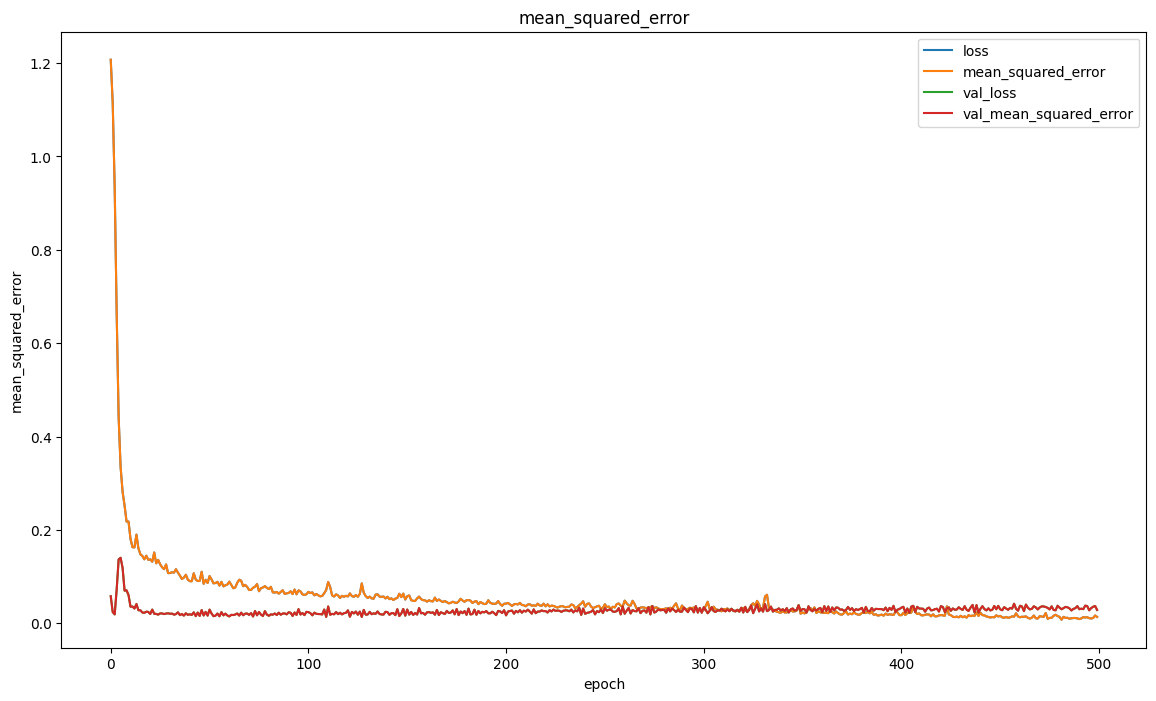

In [50]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')

In [51]:
y_prediksi = model.predict(X_test.astype('float32'))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [52]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Use the imported functions to calculate the metrics
mse2 = mean_squared_error(y_test, y_prediksi) # Note: Standard convention is y_true first, then y_pred
print('MSE =', mse2)
print('MAE =', mean_absolute_error(y_test, y_prediksi)) # Memanggil fungsi mean_absolute_error dan mencetak hasilnya
print('RMSE =', np.sqrt(mse2))
print('R2 Score =', r2_score(y_test, y_prediksi)) # Note: Standard convention is y_true first, then y_pred

MSE = 0.08321351425270646
MAE = 0.0968045376176064
RMSE = 0.28846752720662766
R2 Score = 0.9127138120718515


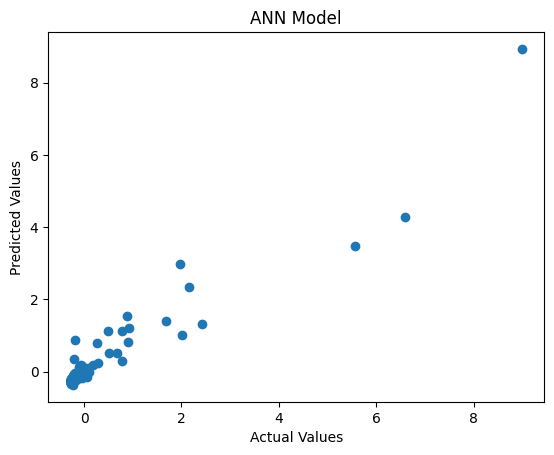

In [53]:
plt.scatter(y_test, y_prediksi)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN Model")
plt.show()

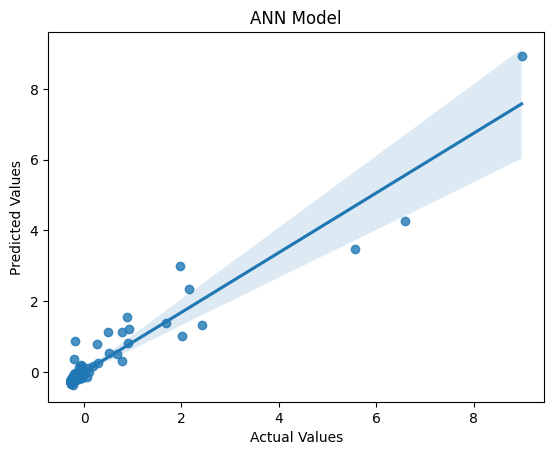

In [54]:
import seaborn as sns
sns.regplot(x=y_test, y=y_prediksi)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN Model")
plt.show()

In [56]:
model.save("model_produksi_tanaman.h5")

In [61]:
import tensorflow as tf
model.tf_version = tf.__version__
print(model.tf_version)

2.18.0
